In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("week_4_data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [49]:
columns = [
    "Make",
"Model",
"Year",
"Engine HP",
"Engine Cylinders",
"Transmission Type",
"Vehicle Style",
"highway MPG",
"city mpg",
"MSRP"
]

df = df[columns]
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [51]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [52]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [53]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [54]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [55]:
df.fillna(value=0,inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [56]:
average = df.msrp.mean()
average

40594.737032063116

In [57]:
df["above_average"] = (df.msrp > average).astype(int)
del df["msrp"]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [58]:
from sklearn.model_selection import train_test_split

df_full_train, df_test= train_test_split(df,test_size = 0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size = 0.25,random_state=1)

y_full_train = df_full_train.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [59]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int32
dtype: object

In [60]:
numerical = ["year","engine_hp","engine_cylinders","highway_mpg","city_mpg"]
categorical = ["make","model","transmission_type","vehicle_style"]

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score

for num in numerical:
    auc = roc_auc_score(y_train,df_train[num])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[num]) # if auc <0.5 then auc = 1- auc  because of negatif correlation
    #if auc < 0.5 : auc = 1-auc
    print(f"{num}   --->   {auc.round(5)}")
    print()

year   --->   0.68755

engine_hp   --->   0.9171

engine_cylinders   --->   0.76612

highway_mpg   --->   0.63306

city_mpg   --->   0.67342



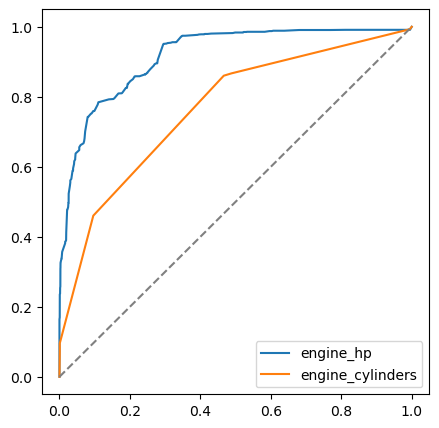

In [62]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label='engine_hp')

fpr, tpr, _ = roc_curve(y_train, df_train.engine_cylinders)
plt.plot(fpr, tpr, label='engine_cylinders')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [63]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

dicts_train = df_train.to_dict(orient="records")
X_train = dv.fit_transform(dicts_train)

dicts_val = df_val.to_dict(orient="records")
X_val = dv.transform(dicts_val)

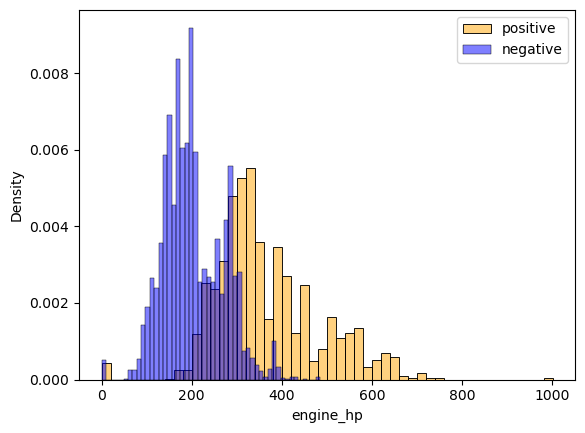

In [64]:
import seaborn as sns
sns.histplot(df_train.engine_hp[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.engine_hp[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [66]:
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(X_val)[:,1]

In [67]:
roc_auc_score(y_val,y_pred)

0.9802249094861359

In [68]:
thresholds = np.linspace(0,1.0,101)
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negeative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negeative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negeative & actual_negeative).sum()
    fp = (predict_positive & actual_negeative).sum()
    fn = (predict_negeative & actual_positive).sum()

    scores.append((t,tp,tn,fp,fn))
my_columns = ["thresholds","tp","tn","fp","fn"]
df_scores = pd.DataFrame(scores,columns=my_columns)
df_scores["precision"] = df_scores.tp / (df_scores.tp+df_scores.fp)
df_scores["recall"] = df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores

,thresholds,tp,tn,fp,fn,precision,recall
0,0.00,654,0,1729,0,0.274444,1.000000
1,0.01,652,945,784,2,0.454039,0.996942
2,0.02,651,1087,642,3,0.503480,0.995413
3,0.03,651,1157,572,3,0.532298,0.995413
4,0.04,650,1234,495,4,0.567686,0.993884
...,...,...,...,...,...,...,...
96,0.96,276,1728,1,378,0.996390,0.422018
97,0.97,252,1728,1,402,0.996047,0.385321
98,0.98,234,1729,0,420,1.000000,0.357798
99,0.99,192,1729,0,462,1.000000,0.293578


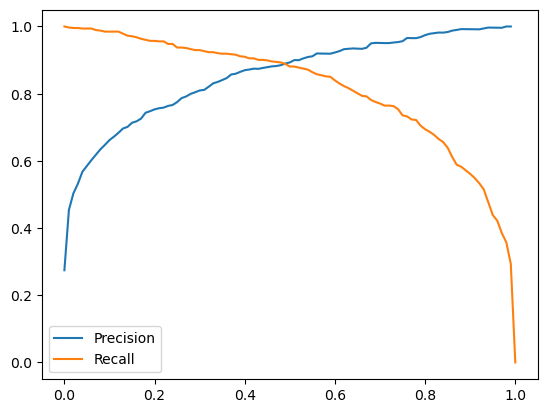

In [69]:
plt.plot(df_scores.thresholds,df_scores.precision,label="Precision")
plt.plot(df_scores.thresholds,df_scores.recall,label="Recall")
plt.legend()

In [70]:
tolerance = 0.01  # Adjust the tolerance to your desired level
intersect_point = df_scores[abs(df_scores['precision'] - df_scores['recall']) < tolerance]
intersect_point

,thresholds,tp,tn,fp,fn,precision,recall
48,0.48,584,1653,76,70,0.884848,0.892966
49,0.49,581,1657,72,73,0.889740,0.888379


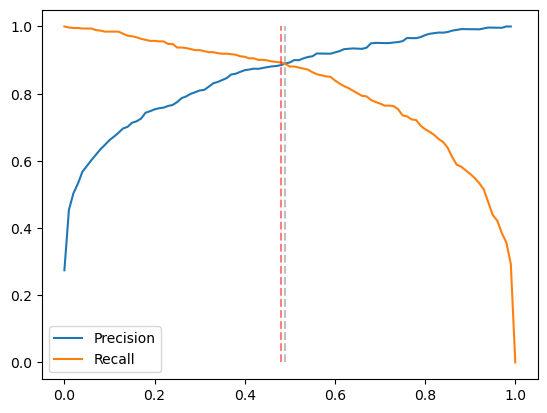

In [71]:
plt.plot(df_scores.thresholds,df_scores.precision,label="Precision")
plt.plot(df_scores.thresholds,df_scores.recall,label="Recall")
plt.vlines(0.48, 0, 1, color='red', linestyle='--', alpha=0.5)
plt.vlines(0.49, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.legend()

## Q4: F1 score

In [72]:
df_scores["F1"] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision+df_scores.recall)
df_scores[df_scores.F1 == df_scores.F1.max()]

,thresholds,tp,tn,fp,fn,precision,recall,F1
51,0.51,576,1665,64,78,0.9,0.880734,0.890263


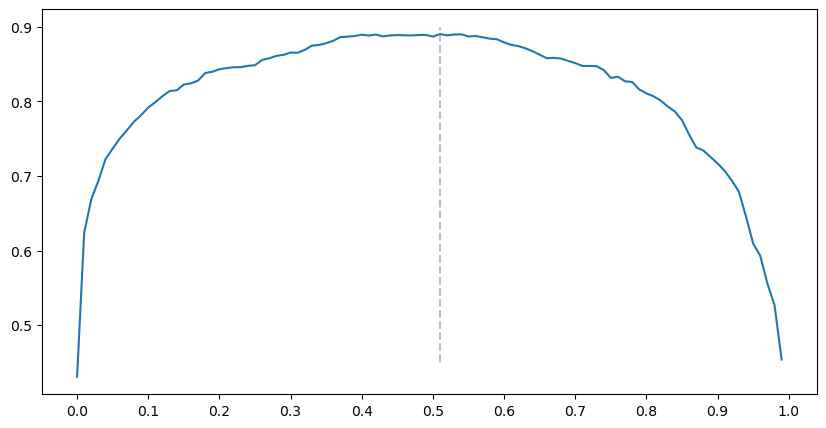

In [76]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.thresholds, df_scores.F1)
plt.vlines(0.51, 0.45, 0.9, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [84]:
columns = list(df.columns)
columns.remove('above_average')
columns

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [85]:
def train(df_train,y_train,C=1):
    dicts_train = df_train[columns].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    model = LogisticRegression(solver='liblinear',C=C,max_iter=1000)
    model.fit(X_train,y_train)
    return dv,model

def predict(df_val,dv,model):
    dicts_val = df_val[columns].to_dict(orient="records")
    X_val = dv.transform(dicts_val)
    y_pred = model.predict_proba(X_val)[:,1]
    return y_pred



In [86]:
from sklearn.model_selection import KFold

In [87]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.979 +- 0.002


In [88]:
from sklearn.model_selection import KFold
scores = []
kf = KFold(n_splits=5,shuffle=True,random_state=1)

for C in [0.01, 0.1, 0.5, 1, 10]:
    for train_idx,val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        dv,model = train(df_train,y_train,C=C)
        y_pred = predict(df_val,dv,model)
        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    print(f"C:{C}\t mean:{np.mean(scores).round(3)}\t std:{np.std(scores).round(3)}")

C:0.01	 mean:0.952	 std:0.002
C:0.1	 mean:0.962	 std:0.01
C:0.5	 mean:0.967	 std:0.012
C:1	 mean:0.97	 std:0.011
C:10	 mean:0.973	 std:0.012


In [93]:
dv,model = train(df_full_train,y_full_train,C=10) # for best mean score
y_pred =predict(df_test,dv,model)
auc = roc_auc_score(y_test,y_pred)
auc

0.9817546181784987